# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


# Load Dataset
#### Data: https://www.kaggle.com/datasets/chethuhn/network-intrusion-dataset


In [2]:
# Ambil semua file CSV
files = glob.glob("*.csv")
print("Ditemukan", len(files), "file CSV")

def detect_label(x):
    cleaned_label = str(x).strip().lower() 
    return "Normal" if cleaned_label == "benign" else "Attack"

dfs = []

for f in files:
    try:
        print(f"Sedang memproses: {f}...")
        df = pd.read_csv(f, low_memory=False)

    except Exception as e:
        print(f"ERROR membaca {f}: {e}")
        continue

    # Buat kolom BinaryLabel
    df["BinaryLabel"] = df[" Label"].apply(detect_label)
    
    dfs.append(df)
    print(f"   -> Berhasil. Jumlah baris: {len(df)}")

# Gabungkan semua
df = pd.concat(dfs, ignore_index=True)

print("\n=== TOTAL GABUNGAN ===")
print(f"{len(df):,} baris")
print(f"Jumlah Kolom: {len(df.columns)}")

print("\n=== Distribusi Binary Label ===")
print(df["BinaryLabel"].value_counts())

Ditemukan 8 file CSV
Sedang memproses: Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv...
   -> Berhasil. Jumlah baris: 170366
Sedang memproses: Wednesday-workingHours.pcap_ISCX.csv...
   -> Berhasil. Jumlah baris: 692703
Sedang memproses: Monday-WorkingHours.pcap_ISCX.csv...
   -> Berhasil. Jumlah baris: 529918
Sedang memproses: Tuesday-WorkingHours.pcap_ISCX.csv...
   -> Berhasil. Jumlah baris: 445909
Sedang memproses: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv...
   -> Berhasil. Jumlah baris: 225745
Sedang memproses: Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv...
   -> Berhasil. Jumlah baris: 288602
Sedang memproses: Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv...
   -> Berhasil. Jumlah baris: 286467
Sedang memproses: Friday-WorkingHours-Morning.pcap_ISCX.csv...
   -> Berhasil. Jumlah baris: 191033

=== TOTAL GABUNGAN ===
2,830,743 baris
Jumlah Kolom: 80

=== Distribusi Binary Label ===
BinaryLabel
Normal    2273097
Attack     557646
Name: count,

# Data Cleaning

In [3]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,BinaryLabel
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN,Normal
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN,Normal
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN,Normal
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN,Normal
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN,Normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 80 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [5]:
df.columns = df.columns.str.strip() #Menghapus spasi di awal dan akhir nama kolom

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 80 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

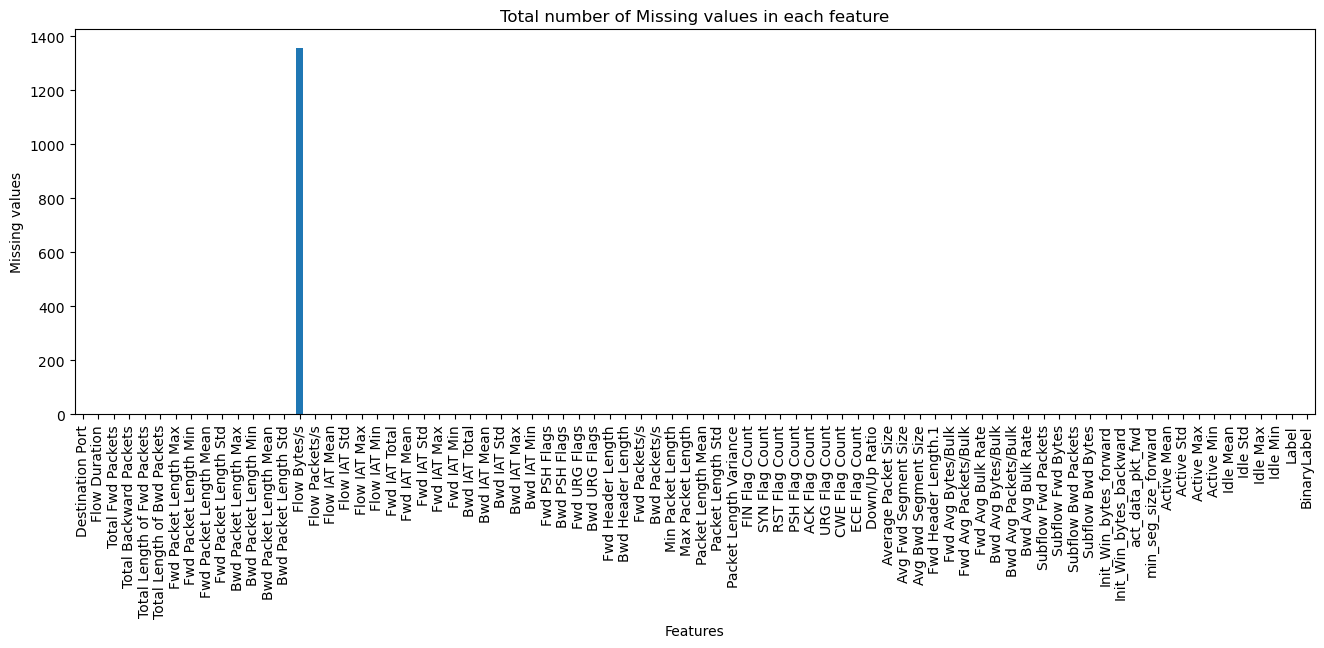

In [7]:
#Fungsi untuk visualisasi mising value
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)

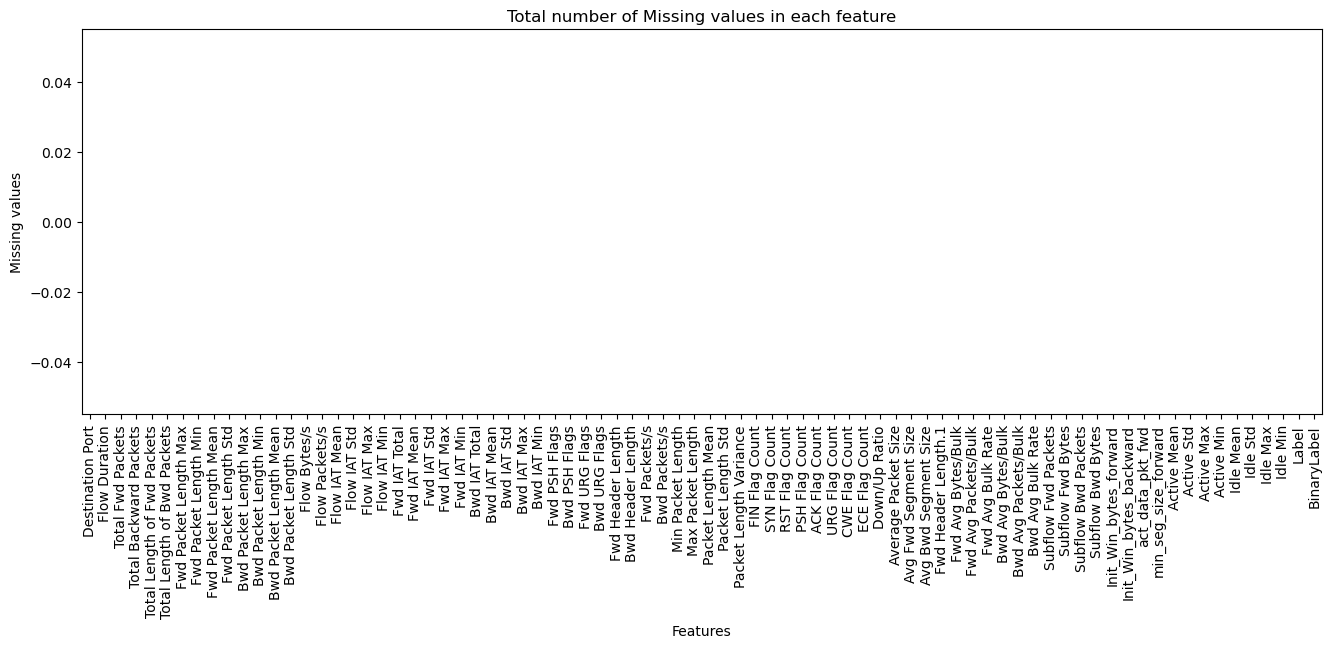

In [8]:
# Hapus baris kosong
plotMissingValues(df.dropna())

In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns
object_cols = df.select_dtypes(include='object').columns

# NILAI NEGATIF (Hanya pada Kolom Numerik)
negative_check = (df[numeric_cols] < 0).any()
print("Kolom yang Mengandung Nilai Negatif:\n", negative_check[negative_check == True])

for col in negative_check[negative_check == True].index:
    df[col] = df[col].clip(lower=0)

# NILAI INFINITY (Khusus CIC-IDS 2017)
infinity_mask = np.isinf(df[numeric_cols]).any()
print("\nKolom yang Mengandung Nilai Infinity:\n", infinity_mask[infinity_mask == True],'\n')

for col in infinity_mask[infinity_mask == True].index:
    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    df[col].fillna(0, inplace=True)

# STRING KOSONG (Hanya pada Kolom Non-Numerik)
object_cols = df.select_dtypes(include='object').columns
empty_string_sum = df[object_cols].apply(lambda x: (x == '').sum())
print("Total String Kosong per Kolom:\n", empty_string_sum[empty_string_sum > 0],'\n')

Kolom yang Mengandung Nilai Negatif:
 Flow Duration              True
Flow Bytes/s               True
Flow Packets/s             True
Flow IAT Mean              True
Flow IAT Max               True
Flow IAT Min               True
Fwd IAT Min                True
Fwd Header Length          True
Bwd Header Length          True
Fwd Header Length.1        True
Init_Win_bytes_forward     True
Init_Win_bytes_backward    True
min_seg_size_forward       True
dtype: bool

Kolom yang Mengandung Nilai Infinity:
 Flow Bytes/s      True
Flow Packets/s    True
dtype: bool 



/tmp/ipykernel_32080/1355840427.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_32080/1355840427.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Total String Kosong per Kolom:
 Series([], dtype: int64) 

